In [ ]:
# for testing local repository and pushing to git hub

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# providing the dataset path
data ='C:/Users/Nael/Desktop/Uganda/Uganda Uthabiti_baseline/ML/refugee_df.csv'
# reading the csv file and named as df
refugee_df = pd.read_csv(data, encoding='latin-1')    

In [3]:
# checking  and # getting all the column names of the dataframe
columns_names = list(refugee_df.columns)
#print(columns_names)    # for printing the column name, remove # from this code line      

# III. Refugees analysis and ML 

## 3.a Exploratory Data Analysis (EDA) 

In [4]:
# dataset size before removal of outliers
refugee_df.shape

(541, 254)

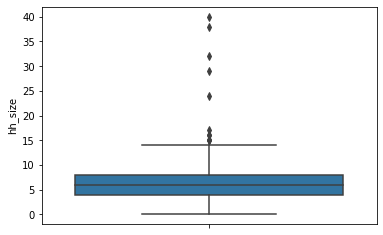

In [5]:
# Box plot of HH size
sns.boxplot(y='hh_size',data=refugee_df)
plt.show()

In [6]:
# remove rows where household size  is greater than 15
refugee_df = refugee_df[refugee_df['hh_size'] <= 15]

In [7]:
# dataset size after removal of outliers
refugee_df.shape

(533, 254)

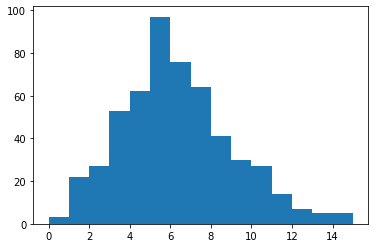

In [8]:
# Plotting the distribution of household size
plt.hist(refugee_df['hh_size'],bins =15)
plt.show()

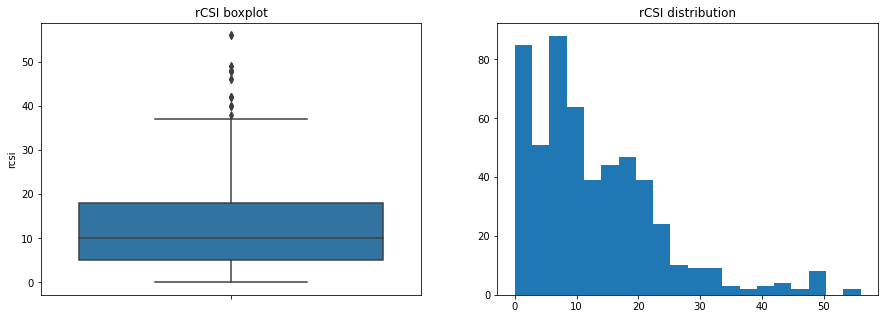

In [9]:
# Coping strategy index distribution and box plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.boxplot(ax=axes[0], data=refugee_df, y='rcsi').set_title('rCSI boxplot')
n, bins, patches = axes[1].hist(x=refugee_df['rcsi'], bins=20)
axes[1].set_title('rCSI distribution')
plt.show()

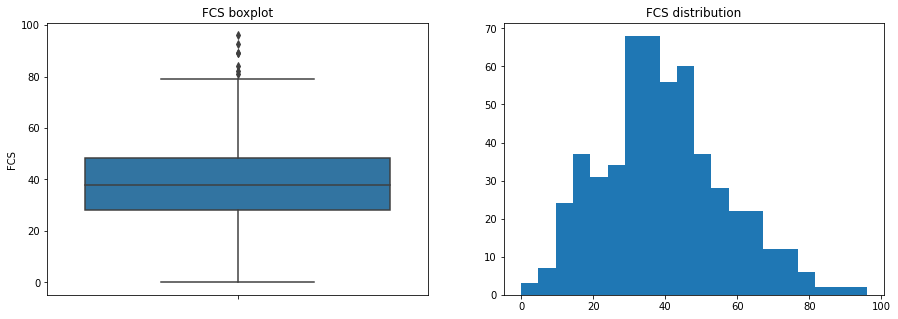

In [10]:
# Food Consumption Score  distribution and box plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.boxplot(ax=axes[0], data=refugee_df, y='FCS').set_title('FCS boxplot')
n, bins, patches = axes[1].hist(x=refugee_df['FCS'], bins=20)
axes[1].set_title('FCS distribution')
plt.show()

In [11]:
# descriptive statistics of Food security outcome indicators and other numerical variable  
refugee_df[['FCS','rcsi','hh_size']].describe()

,FCS,rcsi,hh_size
count,533.000000,533.000000,533.000000
mean,39.324578,12.718574,5.846154
std,17.198496,10.546869,2.758236
min,0.000000,0.000000,0.000000
25%,28.000000,5.000000,4.000000
50%,38.000000,10.000000,6.000000
75%,48.500000,18.000000,7.000000
max,96.000000,56.000000,15.000000


In [12]:
# Creation of a column for number of income sources

In [13]:
refugee_df['num_source_income'] = refugee_df['sources_food_income_Farming_crop_production_sales'] + refugee_df['sources_food_income_Livestock_fattening_sales'] + refugee_df['sources_food_income_Agricultural_labor'] + refugee_df['sources_food_income_Non_agricultural_labor'] + refugee_df['sources_food_income_Petty_trade ']  + refugee_df['sources_food_income_Other_selfemployment_own business_ agricultural']+ refugee_df['sources_food_income_Other_selfemployment_own business _non-agricultural']+ refugee_df['sources_food/income_Rental'] + refugee_df['sources_food_income_Remittances']  + refugee_df['sources_food_income_Gifts_inheritance'] + refugee_df['sources_food_income_Safety net food_cash assistance']

In [14]:
refugee_df['num_source_income'].describe()

count    533.000000
mean       1.611632
std        0.797798
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: num_source_income, dtype: float64

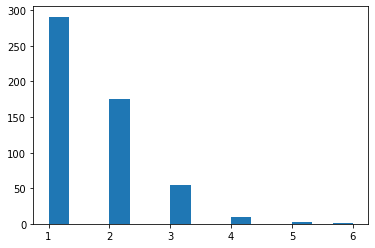

In [15]:
# Plotting the distribution of number of income source
plt.hist(refugee_df['num_source_income'],bins =15)
plt.show()

In [16]:
# Correlation between numerical variables   

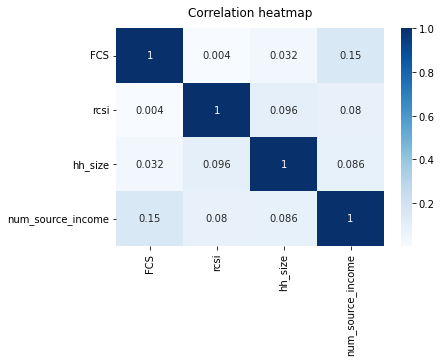

In [17]:
# Plotting the heat map correlation 
heatmap= sns.heatmap(refugee_df[['FCS','rcsi','hh_size','num_source_income']].corr(),cmap = 'Blues', annot = True)  
heatmap.set_title('Correlation heatmap', pad =12)
plt.show()

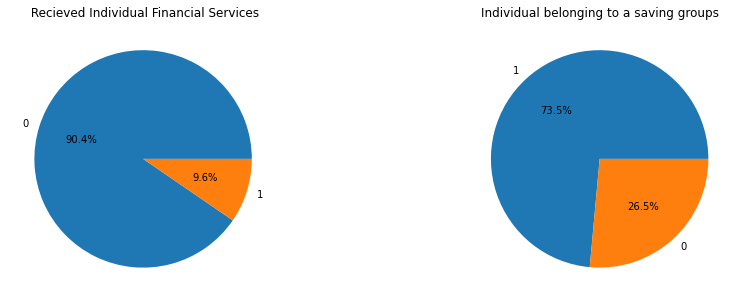

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# first plot 
count_individual_financial = refugee_df['service_Individual_financial'].value_counts()
plt.subplot(1,2,1)
plt.pie(count_individual_financial, labels=count_individual_financial.index,autopct='%1.1f%%')
plt.title(' Recieved Individual Financial Services')

# second plot
count_savingG_member = refugee_df['groupmember_Savings groups '].value_counts()
plt.subplot(1,2,2)
plt.pie(count_savingG_member, labels=count_savingG_member.index,autopct='%1.1f%%')
plt.title('Individual belonging to a saving groups')

plt.show()

C:\Users\Nael\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Nael\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


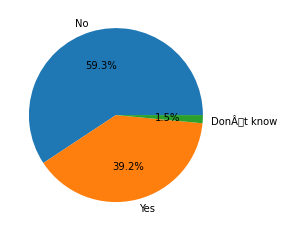

In [19]:
# Count the number of occurrences of each category
count_BT =refugee_df['received_business_training']. value_counts()
 # Plot the result as a pie chart
plt.pie(count_BT, labels= count_BT.index,autopct='%1.1f%%')
plt.show()

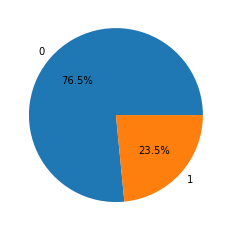

In [20]:
# Count the number of occurrences of each category
count_info_B =refugee_df['R701_Information_Business_investment_opportunities']. value_counts()

plt.pie(count_info_B, labels= count_info_B.index,autopct='%1.1f%%')
plt.show()

## 3.b Clustering analysis using only  the FS  the indicators

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [22]:
# checking one more time for no missing value
checking_missing = refugee_df[['FCS','rcsi','age1','hh_size']].isna().sum()
print (checking_missing)

FCS        0
rcsi       0
age1       0
hh_size    0
dtype: int64


### Features engineering for refugees attributes

In [23]:
# Selecting features and converting into numpy array
x = np.asarray(refugee_df[['FCS','rcsi']])

In [24]:
scaler = StandardScaler()

In [25]:
x = scaler.fit(x).transform(x) # normalizing

In [26]:
x[0:2] # checking normalization for the firt two rows is done

array([[-0.22258753,  0.69103601],
       [ 0.03930906,  1.07065178]])

### Computing inertia and determination of  optimum number of clusters

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

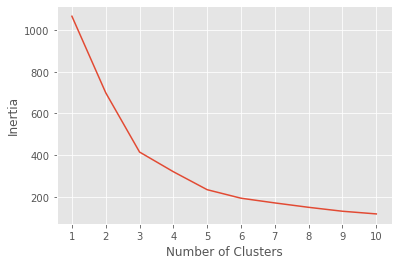

In [27]:
# Creating a variable which is an empty list that store the inertia for each K 
inertia = []

#  for loop 
for a in range (1,11):                 #  a for loop that will iterate over a value ranging from 1 to 10 (K)
    cluster = KMeans (n_clusters = a)  #  instance of K-Means
    cluster.fit(x)                     #  Fitting the instance of K-Means to selected features
    inertia.append (cluster.inertia_)  #  computing and adding the inertias to the empty list 

# Creating a list of number of clusters from 1 to 10
k = list(range(1,11))

# Plotting number of clusters and the computed inertias
plt.style.use("ggplot")
plt.xticks(range(1,11),fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
sns.lineplot(x = k , y =inertia)
plt.show()     

In [28]:
# printing the list of inertia values
print (inertia)

[1066.0000000000002, 699.2949828524829, 415.240033149417, 320.91471219648827, 234.78587167506805, 194.01491909036838, 171.4310421825036, 150.34693349863625, 131.5599882179491, 118.74591043237494]


In [29]:
# locating the elbow point
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
opt = kl.elbow
print('The optimun number of cluster is' , opt)

The optimun number of cluster is 3


### K-Means with the optimum number of K and assigning each data point to a cluster for refugees

In [30]:
# K-Means with optimun K 
clustering = KMeans (n_clusters = opt)
clustering.fit(x)

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3)

In [31]:
# assigning  each data point (row) to a cluster

refugee_df['cluster'] = clustering.labels_


### Getting basic statisctic descriptive for the features in each cluster

In [32]:
# creating a subset for each cluster
refugee_df_cluster0 = refugee_df[refugee_df['cluster'] == 0]
refugee_df_cluster1 = refugee_df[refugee_df['cluster'] == 1]
refugee_df_cluster2 = refugee_df[refugee_df['cluster'] == 2]

In [33]:
# descriptive statistic for cluster 0
refugee_df_cluster0[['FCS','rcsi','hh_size','num_source_income']].describe()

,FCS,rcsi,hh_size,num_source_income
count,260.000000,260.000000,260.000000,260.000000
mean,27.078846,8.500000,5.630769,1.507692
std,10.082983,5.727061,2.539688,0.654608
min,0.000000,0.000000,0.000000,1.000000
25%,18.375000,4.000000,4.000000,1.000000
50%,29.500000,8.000000,5.000000,1.000000
75%,35.500000,13.000000,7.000000,2.000000
max,43.000000,23.000000,14.000000,4.000000


In [34]:
# descriptive statistic for cluster 1
refugee_df_cluster1[['FCS','rcsi','hh_size','num_source_income']].describe()

,FCS,rcsi,hh_size,num_source_income
count,128.000000,128.000000,128.000000,128.000000
mean,40.867188,26.984375,6.421875,1.617188
std,9.035687,9.440226,3.013381,0.814447
min,11.000000,16.000000,1.000000,1.000000
25%,35.500000,20.750000,5.000000,1.000000
50%,42.500000,24.000000,6.000000,1.000000
75%,46.625000,31.000000,8.000000,2.000000
max,64.500000,56.000000,15.000000,5.000000


In [35]:
# descriptive statistic for cluster 2
refugee_df_cluster2[['FCS','rcsi','hh_size','num_source_income']].describe()

,FCS,rcsi,hh_size,num_source_income
count,145.00000,145.000000,145.000000,145.000000
mean,59.92069,7.689655,5.724138,1.793103
std,11.74271,5.904938,2.846740,0.971086
min,44.00000,0.000000,0.000000,1.000000
25%,49.50000,3.000000,4.000000,1.000000
50%,59.00000,7.000000,5.000000,2.000000
75%,67.00000,12.000000,7.000000,2.000000
max,96.00000,26.000000,15.000000,6.000000


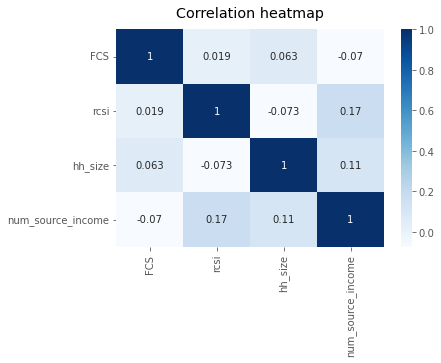

In [36]:
# Plotting the heat map correlation for cluster 1
heatmap= sns.heatmap(refugee_df_cluster1[['FCS','rcsi','hh_size','num_source_income']].corr(),cmap = 'Blues', annot = True)  
heatmap.set_title('Correlation heatmap', pad =12)
plt.show()

### Vizualizing the scatterplots and the clusters (only for selection of two features)

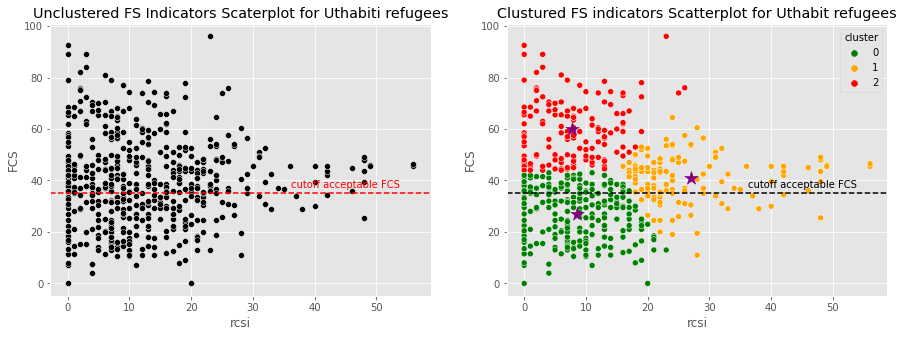

In [37]:
# creating the frame
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# first scatter plot
sns.scatterplot(ax=axes[0], data=refugee_df, x='rcsi', y='FCS',color = 'black').set_title('Unclustered FS Indicators Scaterplot for Uthabiti refugees')
axes[0].axhline(y=35, color='red',linestyle= '--') # Add the horizontal line for FCS >35 acceptable 
axes[0].text(45, 38.5, 'cutoff acceptable FCS', color='red', fontsize=10, va='center', ha='center') # Add text above the line
#second scatter plot
custom_palette = {0: "green", 1: "orange", 2:"red"}
sns.scatterplot(ax=axes[1], data=refugee_df, x='rcsi', y='FCS',hue='cluster',palette=custom_palette).set_title("Clustured FS indicators Scatterplot for Uthabit refugees")
axes[1].axhline(y=35, color='black',linestyle= '--') # Add the horizontal line for FCS >35 acceptable
axes[1].text(45, 38.5, 'cutoff acceptable FCS', color='black', fontsize=10, va='center', ha='center') # Add text above the line
# Add star markers for the center of each cluster
stars = [(7.69, 59.92), (8.5, 27.08), (26.98, 40.87)]
colors = ['purple', 'purple', 'purple']
for i in range(len(stars)):
    x_star, y_star = stars[i]
    color_star = colors[i]
    axes[1].scatter(x_star, y_star, marker='*', s=200, color=color_star) # Add the star marker to the specific point

# Display the plots
plt.show()

In [53]:
# DBSCAN

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [57]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

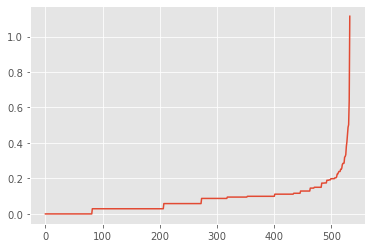

In [58]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [169]:
db = DBSCAN(eps =0.3, min_samples =4)    
db =db.fit(x)


In [170]:
# assigning  each data point (row) to a cluster

refugee_df['cluster_db'] = db.labels_


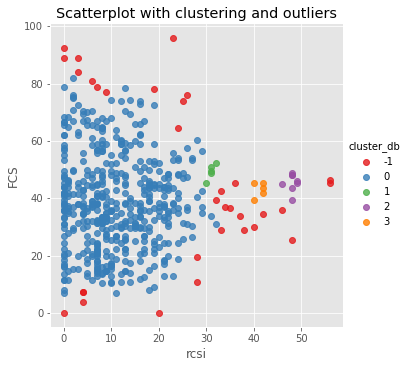

In [171]:
sns.lmplot( data=refugee_df, x='rcsi', y='FCS', hue='cluster_db', fit_reg = False, palette="Set1")
plt.title("Scatterplot with clustering and outliers")
plt.show()

## 3.C Clustering with  FS  indicators and adding demographic data 

In [38]:
# Creation of a new separate column calculating number of male adults, female adulte and children in the household 
refugee_df['num_male_adult'] = refugee_df['m 18-29 years'] + refugee_df['m 30-59 years'] + refugee_df['m 60 years and above'] 
refugee_df['num_female_adult'] = refugee_df['f 18-29 years'] + refugee_df['f 30-59 years'] + refugee_df['f 60 years and above']
refugee_df['num_children'] = refugee_df['m 0-17 years'] + refugee_df['f 0-17 years']

In [39]:
# creation of a new  "boolean"  column for each gendered household type 
refugee_df['FM_gender'] = refugee_df.apply(lambda row: 1 if (row['num_male_adult'] >= 1 and row['num_female_adult'] >= 1) else 0, axis=1)
refugee_df['FNM_gender'] =refugee_df.apply(lambda row: 1 if (row['num_male_adult'] == 0 and row['num_female_adult'] >= 1) else 0, axis=1)
refugee_df['MNF_gender'] = refugee_df.apply(lambda row: 1 if (row['num_male_adult'] >= 1 and row['num_female_adult'] == 0) else 0, axis=1)
refugee_df['CNA_gender'] = refugee_df.apply(lambda row: 1 if (row['num_male_adult'] == 0 and row['num_female_adult'] == 0) else 0, axis=1)

In [40]:
# Creation of single column for gendered household type 
refugee_df['gender_HH_type'] = np.where((refugee_df['FM_gender'] == 1) & (refugee_df['FNM_gender'] == 0) & (refugee_df['MNF_gender'] == 0) & (refugee_df['CNA_gender'] == 0), 'F&M',
                   np.where((refugee_df['FM_gender'] == 0) & (refugee_df['FNM_gender'] == 1) & (refugee_df['MNF_gender'] ==0) & (refugee_df['CNA_gender'] == 0), 'FNM',
                   np.where((refugee_df['FM_gender'] == 0) & (refugee_df['FNM_gender'] == 0) & (refugee_df['MNF_gender'] == 1) & (refugee_df['CNA_gender'] == 0), 'MNF', 'CNA')))

In [41]:
# Define the preprocessing steps for categorical and numerical variables
cat_features = ['gender_HH_type']
cat_transformer = OneHotEncoder()
num_features = ['rcsi', 'FCS','hh_size']
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features),
        ('num', num_transformer, num_features)
    ])

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

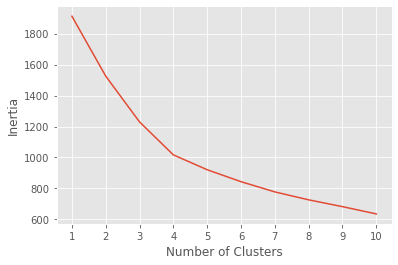

In [42]:
# Creating a variable which is an empty list that store the inertia for each K 
inertia1 = []

#  for loop 
for a in range (1,11):                 #  a for loop that will iterate over a value ranging from 1 to 10 (K)
    clustering1 = KMeans (n_clusters = a)  #  instance of K-Means
    clf1 = Pipeline(steps=[('preprocessor', preprocessor), ('kmeans', clustering1)])
    transformed_data = clf1.fit_transform(refugee_df)
    
    inertia1.append (clustering1.inertia_)  #  computing and adding the inertias to the empty list 

# Creating a list of number of clusters from 1 to 10
k1 = list(range(1,11))

# Plotting number of clusters and the computed inertias
plt.style.use("ggplot")
plt.xticks(range(1,11),fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
sns.lineplot(x = k1 , y =inertia1)
plt.show()     

In [43]:
# printing the list of inertia values
print (inertia1)

[1912.1669793621013, 1525.324554101391, 1229.5372353580776, 1016.8206379090963, 920.8365822304527, 843.7404618531348, 777.7408040035496, 726.5280482907825, 682.5829992267429, 635.5642315993474]


In [44]:
# locating the elbow point
from kneed import KneeLocator
k1 = KneeLocator(range(1, 11), inertia1, curve="convex", direction="decreasing")
opt1 = k1.elbow
print('The optimun number of cluster is' , opt1)

The optimun number of cluster is 4


In [45]:
# Apply the preprocessing steps and K-means clustering
clustering11 = KMeans(n_clusters= 3, random_state=0)
clf1 = Pipeline(steps=[('preprocessor', preprocessor), ('kmeans', clustering11)])
transformed_data = clf1.fit_transform(refugee_df)

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [46]:
refugee_df['cluster11'] = clustering11.labels_

### 3.d Clustering with FS indicators, demographic and Livelihood

In [47]:
# Define the preprocessing steps for categorical and numerical variables
cat_features1 = ['gender_HH_type','groupmember_Savings groups ','received_business_training','R701_Information_Business_investment_opportunities']
cat_transformer1 = OneHotEncoder()
num_features1 = ['rcsi', 'FCS','hh_size','num_source_income']
num_transformer1 = StandardScaler()

preprocessor1 = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer1, cat_features1),
        ('num', num_transformer1, num_features1)
    ])

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

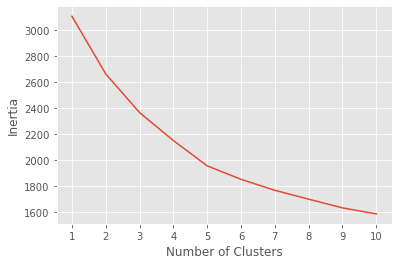

In [48]:
# Creating a variable which is an empty list that store the inertia for each K 
inertia2 = []

#  for loop 
for a in range (1,11):                 #  a for loop that will iterate over a value ranging from 1 to 10 (K)
    clustering2 = KMeans (n_clusters = a)  #  instance of K-Means
    clf2 = Pipeline(steps=[('preprocessor', preprocessor1), ('kmeans', clustering2)])
    transformed_data2 = clf2.fit_transform(refugee_df)
    
    inertia2.append (clustering2.inertia_)  #  computing and adding the inertias to the empty list 

# Creating a list of number of clusters from 1 to 10
k2 = list(range(1,11))

# Plotting number of clusters and the computed inertias
plt.style.use("ggplot")
plt.xticks(range(1,11),fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
sns.lineplot(x = k2 , y =inertia2)
plt.show()     

In [49]:
# printing the list of inertia values
print (inertia2)

[3107.515947467167, 2664.272885640089, 2367.063339886435, 2152.3090334820617, 1957.5579069072664, 1854.1191732363259, 1769.6412006287535, 1701.4220227114324, 1634.3989978798772, 1588.075364267073]


In [50]:
# locating the elbow point
from kneed import KneeLocator
k2 = KneeLocator(range(1, 11), inertia2, curve="convex", direction="decreasing")
opt2 = k2.elbow
print('The optimun number of cluster is' , opt2)

The optimun number of cluster is 5


In [51]:
# Apply the preprocessing steps and K-means clustering
clustering21 = KMeans(n_clusters= 3, random_state=0)
clf2 = Pipeline(steps=[('preprocessor', preprocessor), ('kmeans', clustering21)])
transformed_data2 = clf2.fit_transform(refugee_df)

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [52]:
refugee_df['cluster21'] = clustering21.labels_